In [2]:
from matplotlib import patheffects
import matplotlib.patches as mpatches
import matplotlib.collections as collections
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.style as mplstyle
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random
import numpy as np
from theory.helpers import labelLine, test_annotations, labelLine_at_x, draw_circles, draw_squares, draw_stars
import gameBoardDisplay as gbd
from fractions import Fraction
from scipy import stats
import sympy as sy


%config InlineBackend.figure_formats = ['svg']


mplstyle.use('fast')
mplstyle.use('default')
mpl.rcParams['figure.figsize'] = [10, 20]

colors = ["green", "blue", "red", "orange", "purple",
          "crimson", "lime", "gold", "magenta",  "cyan"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)


[Text(0.5, 0, 'gewürfelter Wert x'), Text(0, 0.5, '$P (x)$')]

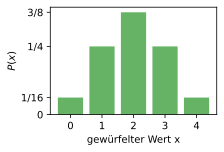

In [3]:
fig_4D0,ax = plt.subplots(1,1,figsize=[3,2],layout="constrained")

x=[0,1,2,3,4]
y=[1/16,1/4,3/8,1/4,1/16]
ax.bar(x,y,color=colors[0],alpha=.6)

y_tick = np.array([])
for item in y:
    y_tick = np.append(y_tick, Fraction(item).limit_denominator())
y_tick
np.unique([0, *y])
ax.set_yticks(np.unique([0, *y]),[0]+np.unique([0, *y_tick]))
ax.set_xticks([0,1,2,3,4])
ax.set(xlabel="gewürfelter Wert x", ylabel=r'$P (x)$')


In [4]:
fig_4D0.savefig(
    "../../tex/game_ur_ba_thesis/img/Grafiken/wahrscheinlichkeitsV_4d0.png", dpi=300,)


3W2

In [5]:
def Menge_str(elemente):
    return "$\\left\{"+",".join([sy.latex(v) for v in elemente.tolist()])+"\\right\}$"

def get_Vergleichswerte(name,zahlen,wahrscheinlichkeiten):
    Ew=sum([wahrscheinlichkeiten[i]*x for i,x in enumerate(zahlen)])
    Var=sum([((zahlen[i]-Ew)**2)*x for i,x in enumerate(wahrscheinlichkeiten)])
    std = sy.sqrt(Var)
    print(name+"&"+Menge_str(zahlen)+"&"+Menge_str(wahrscheinlichkeiten)+"&$"+sy.latex(Ew) + "$&$" + sy.latex(Var)+"$&$"+sy.latex(std)+"$\\\\")
    return name,[*zahlen],[*wahrscheinlichkeiten],Ew,Var,std


In [6]:
halbe = sy.nsimplify(1/2, tolerance=0.001, rational=True)
viertel = sy.nsimplify(1/4, tolerance=0.001, rational=True)
achtel = sy.nsimplify(1/8, tolerance=0.001, rational=True)
sechzentel = sy.nsimplify(1/16, tolerance=0.001, rational=True)


Z_D4 = sy.Array([1, 2, 3,4])
P_D4 = sy.Array([viertel,viertel,viertel,viertel])

Z_D2 = sy.Array([0, 1])
P_D2 = sy.Array([halbe,halbe])

Z_2D2 = sy.Array([0, 1, 2])
P_2D2 = sy.Array([viertel, 2*viertel, viertel])

Z_3D2 = sy.Array([0, 1, 2, 3])
P_3D2 = sy.Array([achtel, 3*achtel, 3*achtel, achtel])

Z_3D2_0TO4 = sy.Array([1, 2, 3,4])
P_3D2_0TO4 = sy.Array([3*achtel, 3*achtel, achtel, achtel])

Z_4D2 = sy.Array([0,1, 2, 3,4])
P_4D2 = sy.Array([sechzentel,viertel, 3*achtel, viertel, sechzentel])

R_D4=get_Vergleichswerte("D4",Z_D4,P_D4)
R_D2=get_Vergleichswerte("D2",Z_D2,P_D2)
R_2D2=get_Vergleichswerte("2D2",Z_2D2,P_2D2)
R_3D2=get_Vergleichswerte("3D2",Z_3D2,P_3D2)
R_4D2=get_Vergleichswerte("4D2",Z_4D2,P_4D2)
R_3D2_0TO4=get_Vergleichswerte("3D2 0$\\to$4",Z_3D2_0TO4,P_3D2_0TO4)

dice=[R_D4, R_D2, R_2D2,R_3D2, R_4D2, R_3D2_0TO4]

D4&$\left\{1,2,3,4\right\}$&$\left\{\frac{1}{4},\frac{1}{4},\frac{1}{4},\frac{1}{4}\right\}$&$\frac{5}{2}$&$\frac{5}{4}$&$\frac{\sqrt{5}}{2}$\\
D2&$\left\{0,1\right\}$&$\left\{\frac{1}{2},\frac{1}{2}\right\}$&$\frac{1}{2}$&$\frac{1}{4}$&$\frac{1}{2}$\\
2D2&$\left\{0,1,2\right\}$&$\left\{\frac{1}{4},\frac{1}{2},\frac{1}{4}\right\}$&$1$&$\frac{1}{2}$&$\frac{\sqrt{2}}{2}$\\
3D2&$\left\{0,1,2,3\right\}$&$\left\{\frac{1}{8},\frac{3}{8},\frac{3}{8},\frac{1}{8}\right\}$&$\frac{3}{2}$&$\frac{3}{4}$&$\frac{\sqrt{3}}{2}$\\
4D2&$\left\{0,1,2,3,4\right\}$&$\left\{\frac{1}{16},\frac{1}{4},\frac{3}{8},\frac{1}{4},\frac{1}{16}\right\}$&$2$&$1$&$1$\\
3D2 0$\to$4&$\left\{1,2,3,4\right\}$&$\left\{\frac{3}{8},\frac{3}{8},\frac{1}{8},\frac{1}{8}\right\}$&$2$&$1$&$1$\\


Text(0.5, 0.98, 'Wahrscheinlichkeitsverteilung der Würfel')

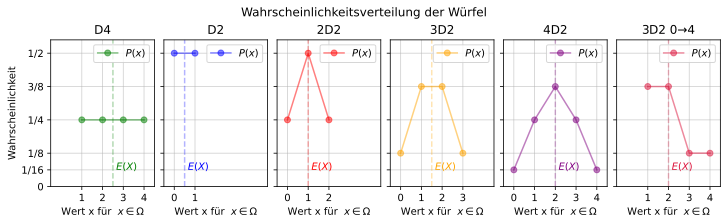

In [7]:
fig_wuerfel, axs = plt.subplots(1, 6, figsize=[10, 3], layout="constrained",sharey=True)

y = [1/16, 1/4, 1/4, 1/8, 3/8, 1/2, ]
for i, d in enumerate(dice):
    axs[i].set_title(d[0])
    axs[i].plot(d[1], d[2], color=colors[i], alpha=.5, label=r'$P (x)$', marker="o")
    # axs[i].bar(d[1], d[2], color=colors[i], alpha=.5, label=r'$P (x)$')
    axs[i].axvline(d[3],color=colors[i],alpha=.3,ls="--")
    # axs[i].axvline(d[3]+d[4],color=colors[i],alpha=.3,ls=":")
    # axs[i].axvline(d[3]-d[4],color=colors[i],alpha=.3,ls=":")
    axs[i].text(d[3], 1/16, r' $E (X)$', color=colors[i], alpha=1)
    axs[i].set_xticks([float(x) for x in d[1]])

y_tick = np.array([])
for item in y:
    y_tick = np.append(y_tick, Fraction(item).limit_denominator())
np.unique([0, *y])
axs[0].set(ylabel='Wahrscheinlichkeit')
for ax in axs:
    ax.set_yticks(np.unique([0, *y]), [0]+np.unique([0, *y_tick]))
    ax.set(xlabel=r"Wert x für  $x\in \Omega$")
    ax.set_xlim(-0.5,4.5)
    ax.set_ylim(0,.55)
    ax.legend(ncol=5,loc="upper right")
    ax.grid(alpha=.6)
fig_wuerfel.suptitle("Wahrscheinlichkeitsverteilung der Würfel")


In [8]:
fig_wuerfel.savefig(
    "../../tex/game_ur_ba_thesis/img/Grafiken/wahrscheinlichkeitsverteilungWuerfel.png", dpi=300,)


Text(0.5, 0.98, 'Spieldauer im Verhältnis zum Erwartungswert des verwendeten Würfels')

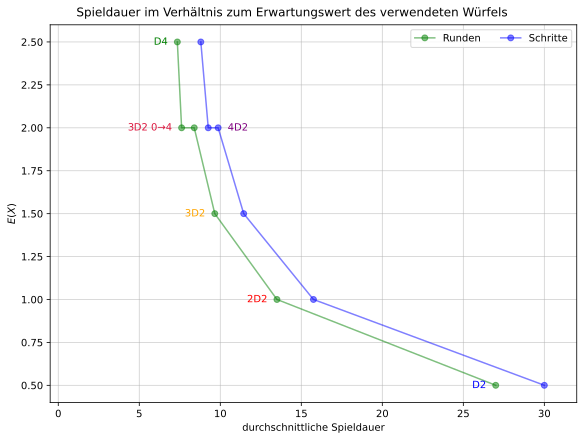

In [11]:
schritte = [30,
            75331762/4782969,
            1108840853928/96889010407,
            1280316980941868/129746337890625,
            417425672509/45097156608,
            9225465/1048576]
runden = [27,
          88553/6561,
          1871893342281/193778020814,
          1088821907187203/129746337890625,
          10986162935393/1443109011456,
          61648355/8388608]
fig_wuerfel_Erwartungswert_Länge, axs = plt.subplots(1, 1, figsize=[8, 6], layout="constrained", sharey=True)

y = [d[3] for d in [R_D2, R_2D2, R_3D2, R_4D2, R_3D2_0TO4, R_D4]]


axs.plot(runden,y, color=colors[0], alpha=.5, label='Runden', marker="o")
axs.plot(schritte,y, color=colors[1], alpha=.5, label='Schritte', marker="o")
# axs.plot([v**.75*y[i] for i,v in enumerate(schritte)],y, color=colors[1], alpha=.3, label='Schritte', marker="o")
# axs.plot(x, y, color=colors[3], alpha=.5, label='Näherung', marker="o")
for i, d in enumerate([R_D2, R_2D2, R_3D2, R_4D2, R_3D2_0TO4, R_D4]):
    if i == 3:
        axs.text(schritte[i], d[3], "   "+d[0], color=colors[dice.index(d)], alpha=1, verticalalignment="center", horizontalalignment="left")
    else:
        axs.text(runden[i], d[3], d[0]+"   ", color=colors[dice.index(d)], alpha=1, verticalalignment="center", horizontalalignment="right")
axs.set(ylabel=r"$E(X)$")
axs.set(xlabel='durchschnittliche Spieldauer')
axs.set_xlim(-0.5, 32)
# axs.set_ylim(0, .55)
axs.legend(ncol=5, loc="upper right")
axs.grid(alpha=.6)
fig_wuerfel_Erwartungswert_Länge.suptitle("Spieldauer im Verhältnis zum Erwartungswert des verwendeten Würfels")


In [12]:
fig_wuerfel_Erwartungswert_Länge.savefig(
    "../../tex/game_ur_ba_thesis/img/Grafiken/SpieldauerErwartungswert.png", dpi=300,)
